In [2]:
%matplotlib inline

Analyze 4i data
===============

This tutorial shows how to apply Squidpy for the analysis of 4i data.

The data used here was obtained from {cite}`Gut2018-ap`.
We provide a pre-processed subset of the data, in {class}`anndata.AnnData` format.
For details on how it was pre-processed, please refer to the original paper.

Import packages & data
----------------------
To run the notebook locally, create a conda environment as *conda env create -f environment.yml* using this
`environment.yml <https://github.com/scverse/squidpy_notebooks/blob/main/environment.yml>`_.

In [3]:
import squidpy as sq

print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.four_i()

squidpy==1.2.2


First, let's visualize cluster annotation in spatial context
with {func}`squidpy.pl.spatial_scatter`.

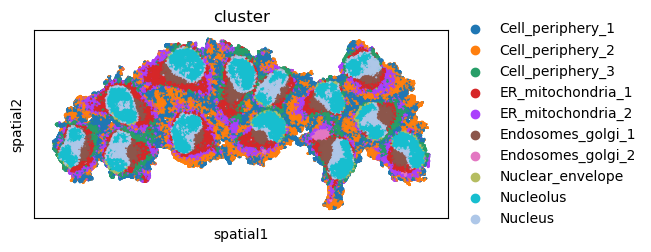

In [4]:
sq.pl.spatial_scatter(adata, shape=None, color="cluster", size=1)

Neighborhood enrichment analysis
--------------------------------
Similar to other spatial data, we can investigate spatial organization of clusters
in a quantitative way, by computing a neighborhood enrichment score.
You can compute such score with the following function: {func}`squidpy.gr.nhood_enrichment`.
In short, it's an enrichment score on spatial proximity of clusters:
if spots belonging to two different clusters are often close to each other,
then they will have a high score and can be defined as being *enriched*.
On the other hand, if they are far apart, the score will be low
and they can be defined as *depleted*.
This score is based on a permutation-based test, and you can set
the number of permutations with the `n_perms` argument (default is 1000).

Since the function works on a connectivity matrix, we need to compute that as well.
This can be done with {func}`squidpy.gr.spatial_neighbors`.
Please see {doc}`../examples/graph/compute_spatial_neighbors` for more details
of how this function works.

Finally, we'll directly visualize the results with {func}`squidpy.pl.nhood_enrichment`.
We'll add a dendrogram to the heatmap computed with linkage method *ward*.

100%|██████████| 1000/1000 [00:21<00:00, 45.75/s]


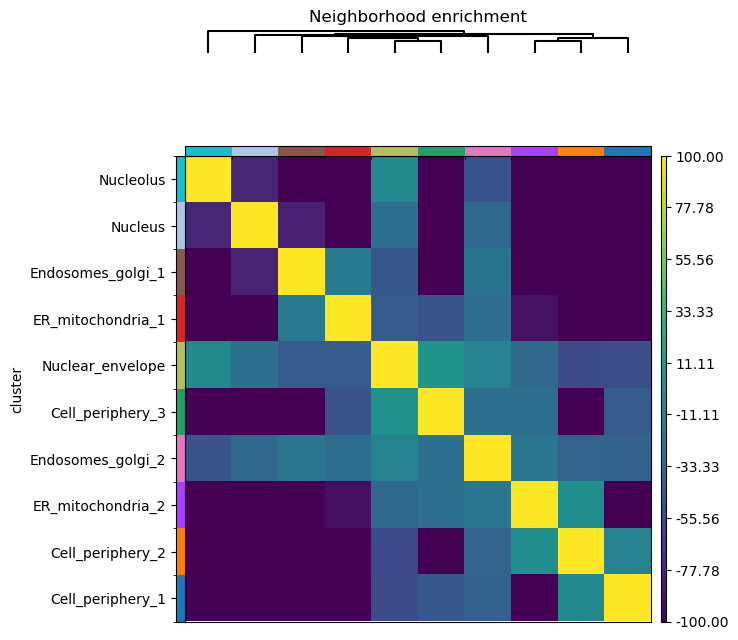

In [5]:
sq.gr.spatial_neighbors(adata, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="cluster")
sq.pl.nhood_enrichment(adata, cluster_key="cluster", method="ward", vmin=-100, vmax=100)

A similar analysis can be performed with {func}`squidpy.gr.interaction_matrix`.
The function computes the number of shared edges in the neighbor graph between clusters.
Please see {doc}`../examples/graph/compute_interaction_matrix` for more details
of how this function works.

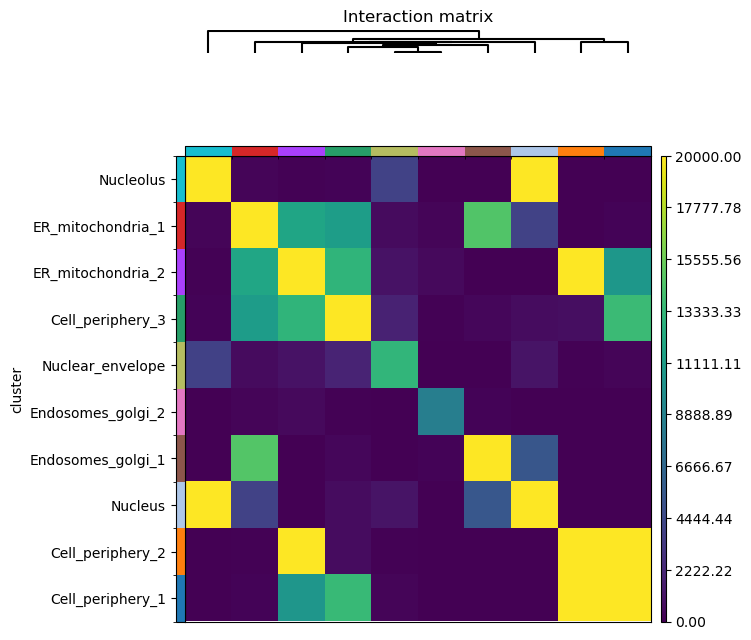

In [6]:
sq.gr.interaction_matrix(adata, cluster_key="cluster")
sq.pl.interaction_matrix(adata, cluster_key="cluster", method="ward", vmax=20000)

Additional analyses to gain quantitative understanding of spatial patterning of
sub-cellular observations are:
- {doc}`../examples/graph/compute_ripley` for Ripley's statistics.
- {doc}`../examples/graph/compute_co_occurrence` for co-occurrence score.

Spatially variable genes with spatial autocorrelation statistics
----------------------------------------------------------------
With Squidpy we can investigate spatial variability of gene expression.
This is an example of a function that only supports 2D data.
{func}`squidpy.gr.spatial_autocorr` conveniently wraps two
spatial autocorrelation statistics: *Moran's I* and *Geary's C*.
They provide a score on the degree of spatial variability of gene expression.
The statistic as well as the p-value are computed for each gene, and FDR correction
is performed. For the purpose of this tutorial, let's compute the *Moran's I* score.
See {doc}`../examples/graph/compute_moran` for more details.

In [7]:
adata.var_names_make_unique()
sq.gr.spatial_autocorr(adata, mode="moran")
adata.uns["moranI"].head(10)

,I,pval_norm,var_norm,pval_norm_fdr_bh
Yap/Taz,0.972975,0.0,0.000001,0.0
CRT,0.958505,0.0,0.000001,0.0
TUBA1A,0.939577,0.0,0.000001,0.0
NUPS,0.915073,0.0,0.000001,0.0
TFRC,0.895786,0.0,0.000001,0.0
HSP60,0.889395,0.0,0.000001,0.0
Actin,0.879217,0.0,0.000001,0.0
CTNNB1,0.876393,0.0,0.000001,0.0
Climp63,0.873853,0.0,0.000001,0.0
VINC,0.862522,0.0,0.000001,0.0


The results are stored in `adata.uns['moranI']` and we can visualize selected genes
with {func}`squidpy.pl.spatial_scatter`.

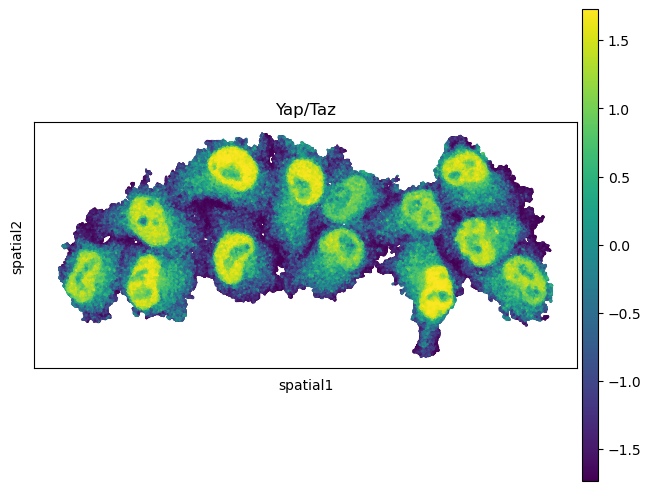

In [8]:
sq.pl.spatial_scatter(adata, shape=None, color="Yap/Taz", size=1)